In [1]:
from shapely.geometry import Polygon
from utils import polygon_to_h3,generate_random_dataset,dict_to_shapely
import pandas as pd
import numpy as np
from h3 import h3
import folium


np.random.seed(111)

In [2]:
polygon = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              80.19371259270753,
              6.307037132469091
            ],
            [
              80.19371259270753,
              6.072771744744614
            ],
            [
              80.4434199500783,
              6.072771744744614
            ],
            [
              80.4434199500783,
              6.307037132469091
            ],
            [
              80.19371259270753,
              6.307037132469091
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

In [3]:
shapyly_polygon = dict_to_shapely(polygon)

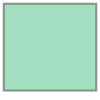

In [4]:
shapyly_polygon

In [5]:
polygon

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'coordinates': [[[80.19371259270753, 6.307037132469091],
      [80.19371259270753, 6.072771744744614],
      [80.4434199500783, 6.072771744744614],
      [80.4434199500783, 6.307037132469091],
      [80.19371259270753, 6.307037132469091]]],
    'type': 'Polygon'}}]}

In [6]:
m = folium.Map(location=[6.3, 80.1], zoom_start=10)

# Plot the Polygon
folium.Polygon(
    locations=[x[::-1] for x in shapyly_polygon.exterior.coords[:]],
    fill=True,
    fill_color='blue'
).add_to(m)

m

In [7]:
cells = polygon_to_h3(shapyly_polygon,10)

In [8]:
len(cells)

44658

In [9]:
lat_lons  = [h3.h3_to_geo(cell) for cell in cells]

In [10]:
poi_categories = ['school','fuel stations','hospitals', 'police stations', 'tourist attractions']

In [11]:
poi_dataset = generate_random_dataset(lat_lons,poi_categories)

In [12]:
outlets = generate_random_dataset(lat_lons,poi_categories=['outlet'],N=5)

In [13]:
len(poi_dataset)

102

In [14]:
for i in range(0,len(poi_dataset)):
    poi = poi_dataset.iloc[i]
    # Add a marker for each POI
    folium.Marker(
        location=[poi['latitude'], poi['longitude']],
        popup=poi['category'],
        icon=folium.Icon(color='blue',icon='info-sign')
    ).add_to(m)

In [15]:
m

In [16]:
for i in range(0,len(outlets)):
    outlet = outlets.iloc[i]
    # Add a marker for each POI
    folium.Marker(
        location=[outlet['latitude'], outlet['longitude']],
        popup=outlet['category'],
        icon=folium.Icon(color='red',icon="home", prefix='fa')
    ).add_to(m)

In [17]:
m

In [18]:
poi_dataset.to_csv("data/pois.csv",index=False)
outlets.to_csv("data/outlets.csv",index=False)
m.save(outfile='data/pois and outlets.html')

In [22]:
import json

with open("data/sample-bbx.geojson",'w+') as f:
    f.write(json.dumps(polygon))